# TP2: Canny Edges[100]

Read, understand, and complete the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). 

Upload it the brightspace under Assignment -> Homework 2 section using a single file (ipynb or zip) with the format `NetID_TP2.ipynb`

To execute the notebook, you will need to [install jupyter](http://jupyter.org/install.html). If you cannot/don't want to use notebooks, you can return both your python code and a report in pdf.

**The first part of the practical is about basic image processing in Python, the second part guides you in the implementation of the Canny edge detector.**

## 1. Playing with images in Python[40]

Here are a set of useful libraries for image processing. You will need to refer to the online documentation of the different libraries to complete the TP.

In [17]:
# Numpy is the key library for manipulating arrays.
# Use the online ressources: https://www.numpy.org/
import numpy as np

# Matplotlib is the standard library used to show images
# The documentation is here: http://matplotlib.org/api/pyplot_api.html
# You can also check this simple intro to using ipython notebook with images:
# https://matplotlib.org/users/image_tutorial.html
import matplotlib.pyplot as plt

# By default, the grayscale images are displayed with the jet colormap: use grayscale instead
plt.rcParams['image.cmap'] = 'gray'

# By default (for matplotlib<3.2), images are rescaled without antialias: enforce it (see question 1.c.)
plt.rcParams['image.interpolation'] = 'hanning'

# One of the several python libraries for image procession
import scipy.ndimage as ndimage

Here is a simple example how to read and display an image.

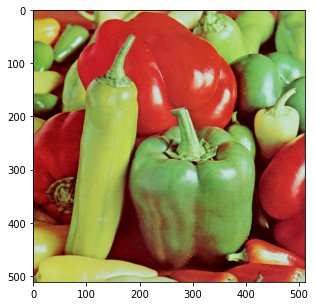

In [18]:
filename = 'legumes.jpg'

I = plt.imread(filename)

# This line is not necessary, but allows you to control the size of the displayed image:
plt.figure(figsize=(5, 5))
plt.imshow(I)
# This line is needed when using several figures, it's also a good practice to use it for readability (explicitly asking to draw the figures created)
plt.show()

**1.a.** What is the type of the image `I`? Its size? 
   What is the type of the values it contains? What is their range? [5]

In [19]:
######################
# Complete that part #
######################
image_type = type(I)
image_size = I.shape
types_of_vals = I.dtype
range = (np.min(I), np.max(I))
# printing the values obtained
print(f"The image type is {image_type}.")
print(f"The image size is {image_size}.")
print(f"The types of values in the image are {types_of_vals}.")
print(f"The range of values in the image are {range}.")

# Tips: look for numpy attributes (e.g. https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)
# and functions to do what you want (e.g. np.min)

The image type is <class 'numpy.ndarray'>.
The image size is (512, 512, 3).
The types of values in the image are uint8.
The range of values in the image are (0, 238).


Here is a simple function to load an image and crop it according to a bounding box. Make sure you understand every line

In [20]:
def load_image_v0(name:str, crop_window:tuple = None):
    I = plt.imread(name)
    if crop_window is not None:
        I = I[crop_window[0]:crop_window[1],
              crop_window[2]:crop_window[3]]
    if I.dtype == np.uint8:
        # PNG images are read as 0-1 float
        # JPEG images are read as 0-255 uint8
        # Scale the values of the image between 0 and 1 (instead of 0 255)
        I = I.astype('float') / 255.
    return I

**1.b.** Use the function to display the 100 pixels *wide* and 50 pixels *high* bottom left corner of `legumes.jpg`. [5]

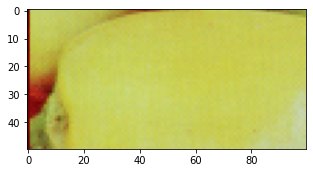

In [21]:
######################
# Complete that part #
######################
filename = 'legumes.jpg'
crop_window = (I.shape[0] - 50, I.shape[0], 0, 100) # setting the parameters
I = load_image_v0(filename, crop_window) #applying the fucntion over here, to crop the image in the required way
# This line is not necessary, but allows you to control the size of the displayed image:
plt.figure(figsize=(5, 5))
plt.imshow(I)
# This line is needed when using several figures
plt.show()

**1.c.** Modify the following code so that `J` is a grid with one *vertical* line every 100 pixels, and one *horizontal* every 20 pixels. What is the difference between the two plots? What is the danger with the `nearest` interpolation?[5]

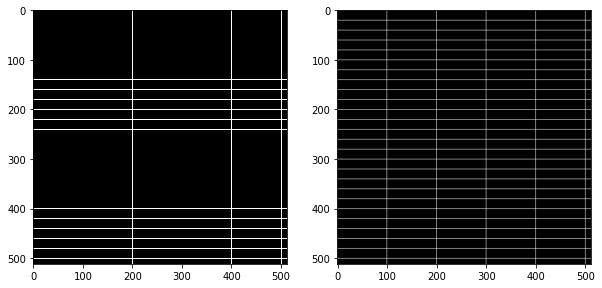

In [22]:
J = np.zeros((512, 512))

######################
# Complete that part #
######################
J[:, ::100] = 1
J[::20, :] = 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(J, interpolation="nearest")
plt.subplot(1, 2, 2)
plt.imshow(J, interpolation="hanning")
plt.show()

The modified plot has non-uniform spacing of grid lines, with vertical lines every 100 pixels and horizontal lines every 20 pixels, while the original plot had uniform spacing.

Nearest interpolation assigns the value of the nearest pixel to an interpolated point, leading to jagged edges or artifacts, especially during image scaling or resizing. This method can produce stair-step effects along edges, resulting in blocky or pixelated edges, particularly noticeable when enlarging images.

In [23]:
# Tips: you can enable matplotlib's notebook interactive mode with the following command
# It allows to zoom in and out the plots easily
%matplotlib notebook

# Having many such plots can be heavy for your computer.
# To revert, use the command
%matplotlib inline

**1.d.** Modify the following function so that it can load an RGB image and convert it to a grayscale image (*i.e.* converting it from a `H×W×3` array to a `H×W` array) using the formula `L = 0.2989 * R + 0.5870 * G + 0.1140 * B`, where `R`, `G` and `B` are the three color channels of the color image and `L` is the luminance (*i.e.* the grayscale image). Include a test so that your function also works if the input image is grayscale.[5]

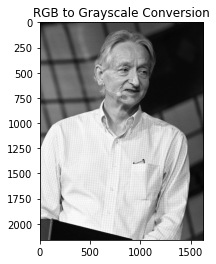

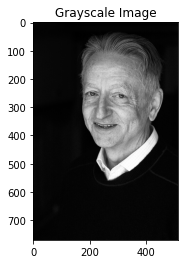

In [24]:
def load_image(name, crop_window=None):
    I = plt.imread(name)
    ######################
    # Complete that part #
    ######################
    if len(I.shape) == 3 and I.shape[2] == 3:
        I = 0.2989 * I[:, :, 0] + 0.5870 * I[:, :, 1] + 0.1140 * I[:, :, 2]
    if crop_window is not None:
        I = I[crop_window[0]:crop_window[1],
              crop_window[2]:crop_window[3]]
    I = I.astype('float') / 255.
    return I
# Test with an RGB image
rgb_filename = 'rgb.jpg'
rgb_image = load_image(rgb_filename)
plt.imshow(rgb_image, cmap='gray')
plt.title('RGB to Grayscale Conversion')
plt.show()
# Test with a grayscale image
gray_filename = 'grey.jpg'
gray_image = load_image(gray_filename)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

Use your function to load a grayscale version of `legumes.jpg` and save it as a png image.

In [25]:
######################
# Complete that part #
import matplotlib.pyplot as plt
def load_image(name, crop_window=None):
    I = plt.imread(name)
    if len(I.shape) == 3 and I.shape[2] == 3:
        I = 0.2989 * I[:, :, 0] + 0.5870 * I[:, :, 1] + 0.1140 * I[:, :, 2]
    if crop_window is not None:
        I = I[crop_window[0]:crop_window[1], crop_window[2]:crop_window[3]]
    I = I.astype('float') / 255.
    return I
filename = 'legumes.jpg'
grayscale_image = load_image(filename)
plt.imsave('legumes_grayscale.png', grayscale_image, cmap='gray')
print("Grayscale image saved as 'legumes_grayscale.png'") #image attatched in the homework submission
######################

Grayscale image saved as 'legumes_grayscale.png'


**For the rest of the TP, *use only grayscale images***

**1.e.** Here is an example of how to convolve an image with a Gaussian. What is the size of the output? What are the border conditions? Replace the border conditions with zero padding and comment on the result.[5]

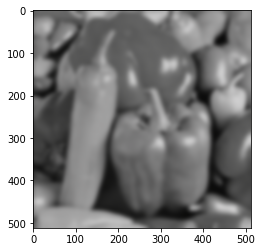

In [26]:
filename = 'legumes.jpg'
I = plt.imread(filename)
Ib = ndimage.gaussian_filter(I, sigma=5)
plt.imshow(Ib)
plt.show()

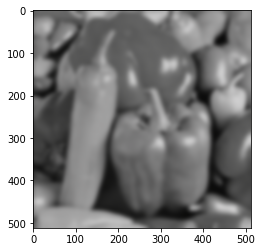

In [27]:
# checking the result with zero paddding
Ibzeropadding = ndimage.gaussian_filter(I, sigma=5, mode='constant', cval=0)
plt.imshow(Ib)
plt.show()

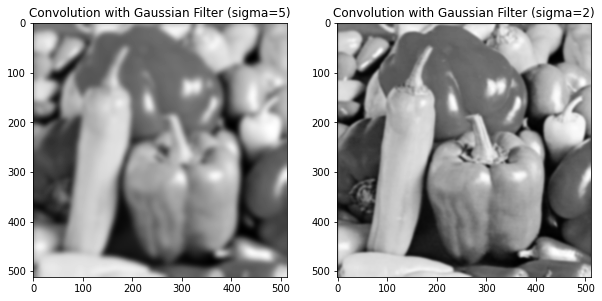

In [28]:
I = load_image('legumes.jpg')
Ib1 = ndimage.gaussian_filter(I, sigma=5) #mode = constant, cval = 0 
Ib2 = ndimage.gaussian_filter(I, sigma=2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Ib1, cmap='gray')
plt.title('Convolution with Gaussian Filter (sigma=5)')
plt.subplot(1, 2, 2)
plt.imshow(Ib2, cmap='gray')
plt.title('Convolution with Gaussian Filter (sigma=2)')
plt.show()

The size of the output image is determined by the size of the input image and the size of the kernel used for convolution. Since we're using a 5x5 Gaussian kernel, the output size will be the same as the input size.

Zero padding ensures that the output image size matches the input image size. However, it may introduce artifacts around the edges due to the abrupt cutoff of intensity values. This can affect the accuracy of features near the image boundaries.

**1.f.** What does the following code do? What is its visual effect on the image?[5]

In [29]:
k = np.array([[-1./9, -1./9, -1./9],
              [-1./9, 17./9, -1./9],
              [-1./9, -1./9, -1./9]])
O = ndimage.convolve(I, k)

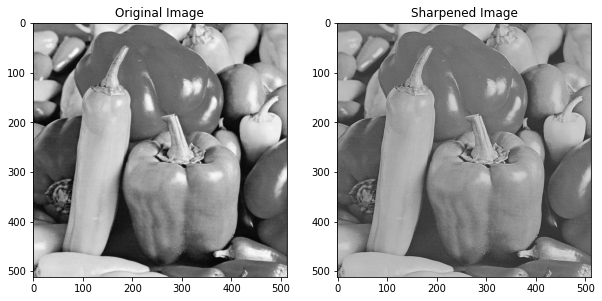

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(O, cmap='gray')
plt.title('Sharpened Image')
plt.show()

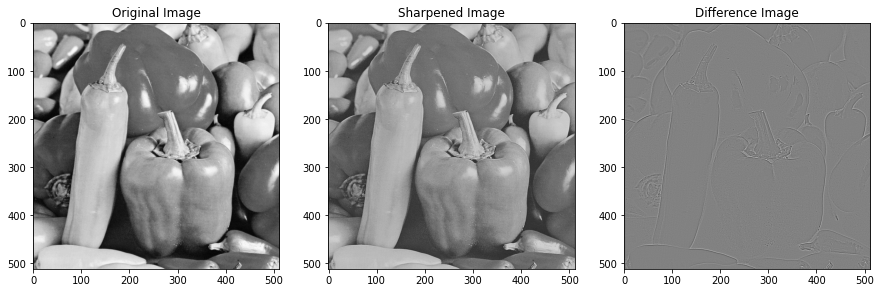

In [31]:

I = load_image('legumes.jpg')
k = np.array([[-1./9, -1./9, -1./9],
              [-1./9, 17./9, -1./9],
              [-1./9, -1./9, -1./9]])
O = ndimage.convolve(I, k)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(O, cmap='gray')
plt.title('Sharpened Image')
difference = I - O
plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference Image')
plt.show()



**1.g.** Write a function `compute_gradient` that returns three arrays/images: two containing the input image gradients (along each axis), and another with the gradient norm. 
It should take an optional argument `sigma` that gives the smoothing of the derivative (i.e. the standard deviation of the Gaussian kernel used to blur the image before taking the derivative). 

What is the size of the output compared to the size of the input?[5]

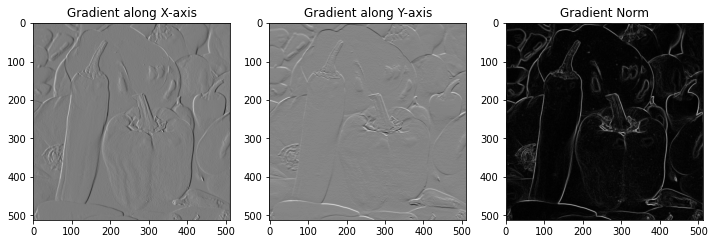

In [19]:
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

def compute_gradient(I, sigma=0):
    if sigma > 0:
        I_smoothed = ndimage.gaussian_filter(I, sigma=sigma)
    else:
        I_smoothed = I
    Gx = ndimage.sobel(I_smoothed, axis=1)
    Gy = ndimage.sobel(I_smoothed, axis=0)
    Gn = np.sqrt(Gx**2 + Gy**2)
    return Gx, Gy, Gn
I = load_image('legumes.jpg')
Gx, Gy, Gn = compute_gradient(I)
# Visualize the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient along X-axis')
plt.subplot(1, 3, 2)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient along Y-axis')
plt.subplot(1, 3, 3)
plt.imshow(Gn, cmap='gray')
plt.title('Gradient Norm')
plt.show()


The size of the output arrays/images (gradient along x, gradient along y, and gradient norm) will be the same as the size of the input image.

**1.h.** Visualize the three images returned by your function for different values of sigma.[5]

If you had difficulties to do this first part, it might be good to look at a few more examples before writting your own code. You can find many python tutorial for image processing online, for example http://www.scipy-lectures.org/advanced/image_processing/

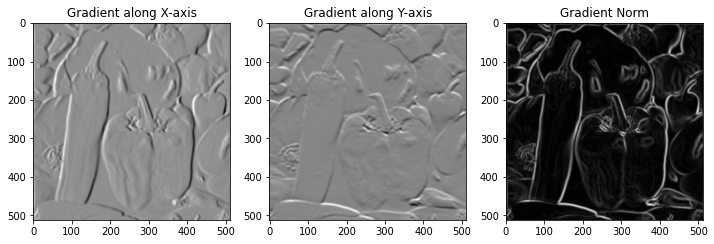

In [32]:
#taking the value of sigma as 2
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

def compute_gradient(I, sigma=0):
    if sigma > 0:
        I_smoothed = ndimage.gaussian_filter(I, sigma=sigma)
    else:
        I_smoothed = I
    Gx = ndimage.sobel(I_smoothed, axis=1)
    Gy = ndimage.sobel(I_smoothed, axis=0)
    Gn = np.sqrt(Gx**2 + Gy**2)
    return Gx, Gy, Gn
I = load_image('legumes.jpg')
Gx, Gy, Gn = compute_gradient(I, 2) #taking sigma as 2 here
# Visualize the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient along X-axis')
plt.subplot(1, 3, 2)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient along Y-axis')
plt.subplot(1, 3, 3)
plt.imshow(Gn, cmap='gray')
plt.title('Gradient Norm')
plt.show()

## 2. Canny edges [60][ Each question - 12 points]

**2.a.** Write a simple function `threshold(G, threshold)` that threshold the norm of the gradient and outputs a *binary* image. Discuss the parameters (there are two) and their visual influence of the results.

3.574285644057948e-05 1.113415264888763


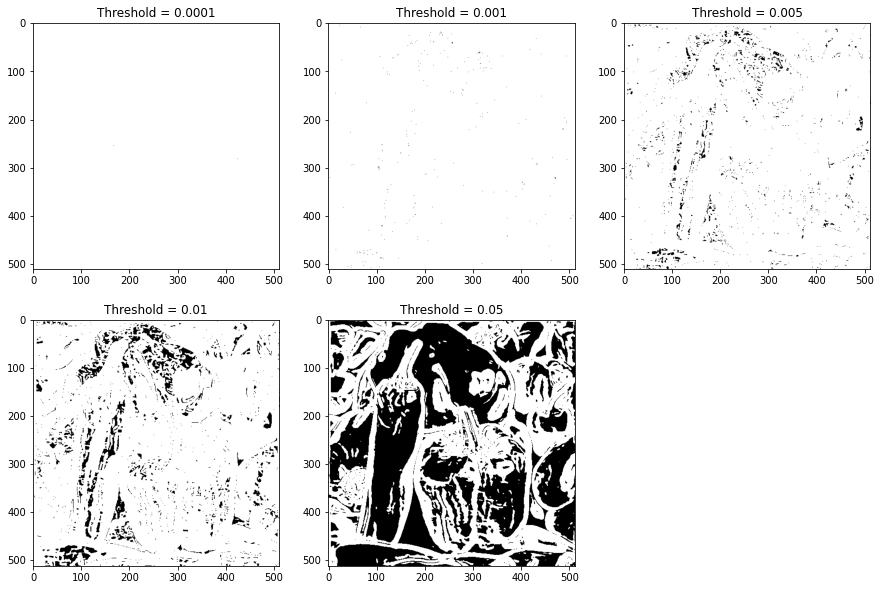

In [33]:
import numpy as np
import matplotlib.pyplot as plt
def threshold(G, threshold):
    binary_image = G > threshold
    return binary_image
# G = np.sqrt(Gx**2 + Gy**2)
G = Gn
print(np.min(G), np.max(G)) #to adjust our values for thresholds
threshold_values = [0.0001, 0.001, 0.005, 0.01, 0.05]
plt.figure(figsize=(15, 10))
for i, threshold_value in enumerate(threshold_values, 1):
    # Threshold the gradient magnitude image
    binary_result = threshold(G, threshold_value)
    # Plot the results
    plt.subplot(2, 3, i)
    plt.imshow(binary_result, cmap='gray')
    plt.title(f'Threshold = {threshold_value}')
plt.show()

**2.b.** Write a function `nms(gradient)` which takes as input the full gradient and outputs a *binary* image with value 1 only for pixels that correspond to a maximum in one of the given directions of the gradient. (You can try other gradient directions if you wish)

Display the resulting binary image for a given set of parameters, and comment on how question **1.c.** might affect your visual results.

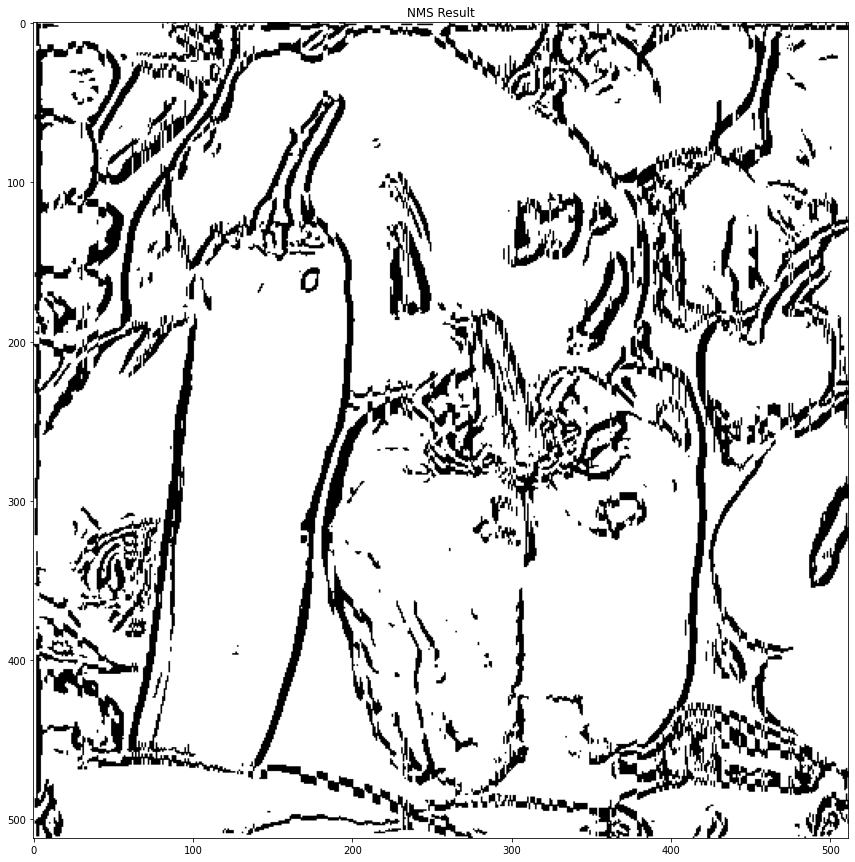

In [34]:
import numpy as np
import matplotlib.pyplot as plt

NEIGHBORS = np.array([[1, 0], [1, 1], [0, 1], [-1, 1]])  # Corrected NEIGHBORS array
GRAD_DIRS = np.array([[1, 0], [2**-.5, 2**-.5], [0, 1], [2**-.5, -2**-.5]])

def nms(gradient, threshold=0.1):  # Adjust the threshold value
    Gy, Gx, Gn = gradient
    h, w = Gy.shape
    output = np.zeros(Gx.shape, dtype=bool)
    grad_directions = np.arctan2(Gy, Gx)
    Gn = np.abs(Gn)
    max_dir = np.argmax(np.abs(np.cos(grad_directions) * Gx + np.sin(grad_directions) * Gy), axis=0)
    i = 0
    while i < h:
        j = 0
        while j < w:
            if np.ndim(max_dir) == 1:
                dir_idx = max_dir[j] % len(NEIGHBORS)
            else:
                dir_idx = max_dir[i, j] % len(NEIGHBORS)
            dy, dx = NEIGHBORS[dir_idx]
            if (
                i + dy >= 0 and i + dy < h and
                j + dx >= 0 and j + dx < w and
                Gn[i, j] > Gn[i + dy, j + dx] and
                Gn[i, j] > threshold  # Apply threshold to the gradient magnitude
            ):
                output[i, j] = True
            j += 1
        i += 1
    return output

# Assuming you have defined 'load_image' and 'compute_gradient' functions elsewhere
I = load_image('legumes.jpg')
gradient = compute_gradient(I, sigma=2)
plt.figure(figsize=(15, 15))
plt.imshow(1 - nms(gradient), cmap='gray')
plt.title('NMS Result')
plt.show()

Changing the spacing of grid lines in a plot, as in question 1.c., can alter the visual representation of data. Non-uniform grid spacing may distort the perception of data points and affect the plot's aesthetics, scale, and aspect ratio

**2.c.** Use both `nms` and `threshold` to extract edges with a gradient norm larger than a given threshold and compare visually.

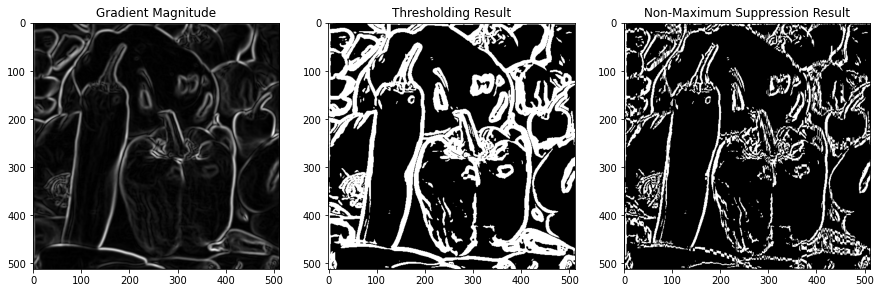

In [24]:
import numpy as np
import matplotlib.pyplot as plt

NEIGHBORS = np.array([[1, 0], [1, 1], [0, 1], [-1, 1]])  # Corrected NEIGHBORS array
GRAD_DIRS = np.array([[1, 0], [2**-.5, 2**-.5], [0, 1], [2**-.5, -2**-.5]])

def nms(gradient, threshold=0.1):
    Gy, Gx, Gn = gradient
    h, w = Gy.shape
    output = np.zeros(Gx.shape, dtype=bool)
    grad_directions = np.arctan2(Gy, Gx)
    Gn = np.abs(Gn)
    max_dir = np.argmax(np.abs(np.cos(grad_directions) * Gx + np.sin(grad_directions) * Gy), axis=0)

    i = 0
    while i < h:
        j = 0
        while j < w:
            if np.ndim(max_dir) == 1:
                dir_idx = max_dir[j] % len(NEIGHBORS)
            else:
                dir_idx = max_dir[i, j] % len(NEIGHBORS)
            dy, dx = NEIGHBORS[dir_idx]
            if (
                i + dy >= 0 and i + dy < h and
                j + dx >= 0 and j + dx < w and
                Gn[i, j] > Gn[i + dy, j + dx] and
                Gn[i, j] > threshold
            ):
                output[i, j] = True
            j += 1
        i += 1
    return output
I = load_image('legumes.jpg')
gradient = compute_gradient(I, sigma=2)
threshold_value = 0.1
binary_threshold = threshold(gradient[2], threshold_value)
binary_nms = nms(gradient, threshold_value)
plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(gradient[2], cmap='gray')
plt.title('Gradient Magnitude')
plt.subplot(1, 3, 2)
plt.imshow(binary_threshold, cmap='gray')
plt.title('Thresholding Result')
plt.subplot(1, 3, 3)
plt.imshow(binary_nms, cmap='gray')
plt.title('Non-Maximum Suppression Result')
plt.show()


**2.d.** Implement a function computing the full Canny edges by adding a **hysteresis thresholding** to the processing.

Here is one way to do the hysteresis thresholding:
  - Keep a list of the edges for which you have to visit neighbours;
  - Initialize the list with the edges corresponding to the most discriminative threshold;
  - Until the list is empty:
    * Take an edge you are sure of (*i.e.* from the list)
    * Check if its neighbours are considered edges using the less discriminative threshold;
      - If they are, add them to the output edges and in the list of edges to visit.

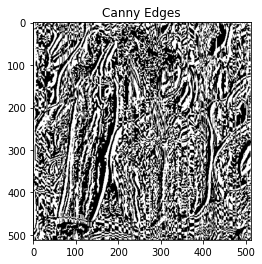

In [28]:
def hysteresis(Gn_nms, t_low, t_high):
    h, w = Gn_nms.shape
    edges_to_visit = []
    high_threshold_indices = np.where(Gn_nms >= t_high)
    edges_to_visit.extend(list(zip(high_threshold_indices[0], high_threshold_indices[1])))
    edges_output = np.zeros_like(Gn_nms, dtype=bool)
    while edges_to_visit:
        current_edge = edges_to_visit.pop()
        i, j = current_edge
        if 0 <= i < h and 0 <= j < w:
            if not edges_output[i, j]:
                edges_output[i, j] = True
                neighbors = [
                    (i-1, j-1), (i-1, j), (i-1, j+1),
                    (i, j-1),                 (i, j+1),
                    (i+1, j-1), (i+1, j), (i+1, j+1)
                ]
                edges_to_visit.extend(
                    neighbor for neighbor in neighbors
                    if 0 <= neighbor[0] < h and 0 <= neighbor[1] < w
                    and Gn_nms[neighbor[0], neighbor[1]] >= t_low
                )
    return edges_output
def canny_edges(I, sigma=2, t_low=0.01, t_high=0.08):
    G = compute_gradient(I, sigma=sigma)
    Gn_nms = nms(G, threshold=t_low)
    edges_canny = hysteresis(Gn_nms, t_low, t_high)
    return edges_canny
I = load_image('legumes.jpg')
canny_result = canny_edges(I)
plt.imshow(canny_result, cmap='gray')
plt.title('Canny Edges')
plt.show()


**2.e.** Use your algorithm with different parameters and comment on their respective effects.

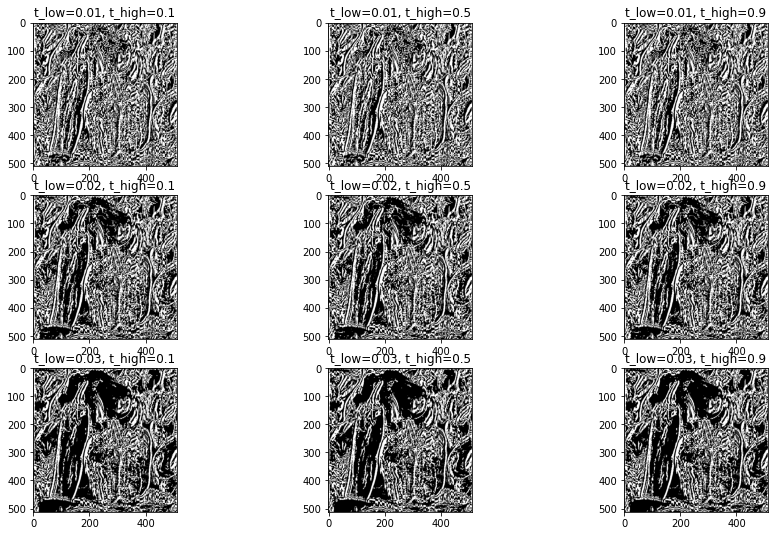

In [35]:
# Load the image
I = load_image('legumes.jpg')

# Set different parameter values
t_low_values = [0.01, 0.02, 0.03]
t_high_values = [0.1, 0.5, 0.9]

# Plot the Canny edges for different parameter combinations
plt.figure(figsize=(15, 9))
for i, t_low in enumerate(t_low_values):
    for j, t_high in enumerate(t_high_values):
        # Compute Canny edges with current parameters
        canny_result = canny_edges(I, t_low=t_low, t_high=t_high)

        # Display the Canny edges for the current parameters
        plt.subplot(len(t_low_values), len(t_high_values), i * len(t_high_values) + j + 1)
        plt.imshow(canny_result, cmap='gray')
        plt.title(f't_low={t_low}, t_high={t_high}')

plt.show()




t_low: This parameter controls the minimum gradient value to consider for an edge pixel. Lower values will detect weaker edges, potentially resulting in more false positives or noise in the output. Higher values will detect only stronger edges, potentially missing weaker edges.

t_high: This parameter sets the threshold for identifying strong edge pixels. Pixels with gradient magnitudes above this threshold are considered strong edge pixels. Lower values will identify more pixels as strong edges, potentially leading to thicker or more connected edge lines. Higher values will result in fewer identified strong edges, potentially leading to thinner or more fragmented edge lines.